Loading from: C:\Users\yugmu\OneDrive\Desktop\GeoGuessr-Plus-Plus\compressed_dataset
Regions (first 5): ['Aland', 'Albania', 'American Samoa', 'Andorra', 'Antarctica']


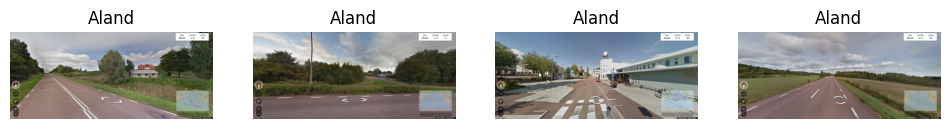

Top 10 regions by image count:


,count
United States,12014
Japan,3840
France,3573
United Kingdom,2484
Brazil,2320
Russia,1761
Australia,1704
Canada,1382
South Africa,1183
Spain,1075


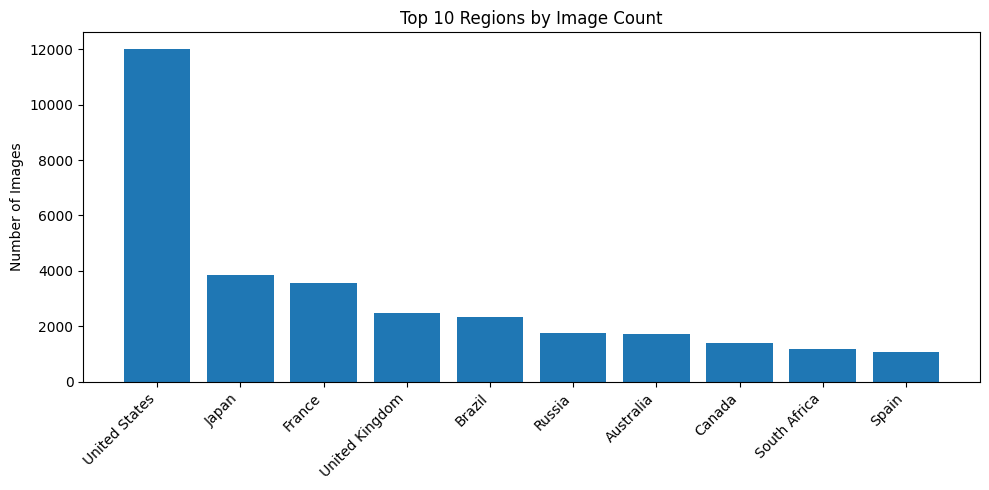

In [10]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

# 1) Point directly to where you actually have the folder
IMG_DIR = r"C:\Users\yugmu\OneDrive\Desktop\GeoGuessr-Plus-Plus\compressed_dataset"

# sanity check
assert os.path.isdir(IMG_DIR), f"Folder not found: {IMG_DIR}"
print("Loading from:", IMG_DIR)

# 2) List your “region” subfolders
regions = sorted([d for d in os.listdir(IMG_DIR)
                  if os.path.isdir(os.path.join(IMG_DIR, d))])
print("Regions (first 5):", regions[:5])

# 3) Show 4 sample images from the first region
first = regions[0]
sample_folder = os.path.join(IMG_DIR, first)
sample_images = sorted(os.listdir(sample_folder))[:4]

fig, axes = plt.subplots(1, 4, figsize=(12, 4))
for ax, fname in zip(axes, sample_images):
    img = Image.open(os.path.join(sample_folder, fname))
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(first)
plt.show()

# 4) Count images per region & build a DataFrame
counts = {r: len(os.listdir(os.path.join(IMG_DIR, r))) for r in regions}
df = pd.DataFrame.from_dict(counts, orient='index', columns=['count']) \
               .sort_values('count', ascending=False)

# 5) Print & plot top 10 regions
print("Top 10 regions by image count:")
display(df.head(10))

plt.figure(figsize=(10,5))
plt.bar(df.head(10).index, df.head(10)['count'])
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of Images')
plt.title('Top 10 Regions by Image Count')
plt.tight_layout()
plt.show()


In [6]:
# This will use the same interpreter your notebook is already on
%pip install -r ../requirements.txt


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip
